In [1]:
# resimleri tanıtma kanser teşhisi 

# MNIST Hand Written Digit Recognition

In [2]:
import tensorflow as tf

In [3]:
mnist=tf.keras.datasets.mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
import matplotlib.pyplot as plt

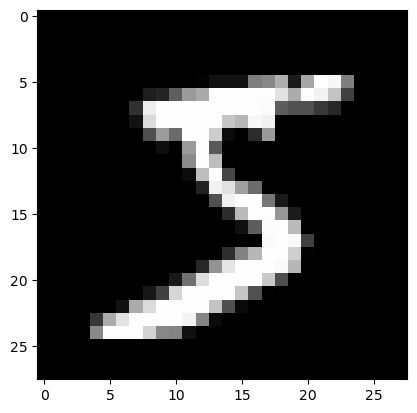

In [6]:
plt.imshow(train_images[0],cmap='gray');

In [7]:
import numpy as np

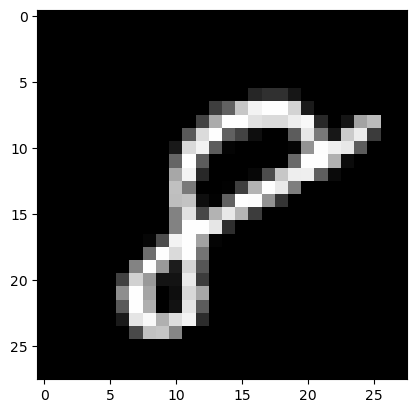

In [8]:
plt.imshow(train_images[59999],cmap='gray')

In [9]:
train_labels[59999]

8

In [10]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

# Normalize/Standardize etmek 

In [11]:
train_images=train_images/255.0#rgb de 0 ile 255 arasında değer alır bütün rakamları 0 ile 1 arasına indirdik standart hale getirdik 

In [12]:
test_images=test_images/255.0

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,InputLayer,Reshape

In [28]:
model=Sequential()
model.add(InputLayer(input_shape=(28,28)))
model.add(Reshape(target_shape=(28,28,1)))
model.add(Conv2D(filters=12,kernel_size=(3,3),activation='relu'))#cnn
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(10))
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer='adam',metrics='accuracy')

In [29]:
model.fit(train_images,train_labels,validation_split=0.10,epochs=10)#epochs bir yerden kaç kez geçtiğini gösteriyor 

Epoch 1/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2989 - accuracy: 0.9177 - val_loss: 0.1121 - val_accuracy: 0.9708
Epoch 2/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1079 - accuracy: 0.9690 - val_loss: 0.0869 - val_accuracy: 0.9770
Epoch 3/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0785 - accuracy: 0.9775 - val_loss: 0.0644 - val_accuracy: 0.9843
Epoch 4/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0663 - accuracy: 0.9807 - val_loss: 0.0689 - val_accuracy: 0.9823
Epoch 5/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0581 - accuracy: 0.9826 - val_loss: 0.0595 - val_accuracy: 0.9842
Epoch 6/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0515 - accuracy: 0.9847 - val_loss: 0.0666 - val_accuracy: 0.9848
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0468 - accuracy: 0.9860 - val_loss: 0.0607 - val_accuracy:

In [30]:
_,accuracy=model.evaluate(test_images,test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.0606 - accuracy: 0.9810


In [31]:
accuracy*100

98.1000006198883

In [18]:
model.save("digitrecognition.hd5")

In [19]:
model=Sequential()
model.add(InputLayer(input_shape=(28,28)))
model.add(Reshape(target_shape=(28,28,1)))
model.add(Conv2D(filters=12,kernel_size=(3,3),activation='relu'))#cnn
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(10))
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer='adam',metrics='accuracy')

In [20]:
model.fit(train_images,train_labels,validation_split=0.10,epochs=15 )

Epoch 1/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2946 - accuracy: 0.9197 - val_loss: 0.1059 - val_accuracy: 0.9727
Epoch 2/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1056 - accuracy: 0.9693 - val_loss: 0.0749 - val_accuracy: 0.9780
Epoch 3/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0769 - accuracy: 0.9778 - val_loss: 0.0651 - val_accuracy: 0.9820
Epoch 4/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0640 - accuracy: 0.9813 - val_loss: 0.0592 - val_accuracy: 0.9815
Epoch 5/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0566 - accuracy: 0.9834 - val_loss: 0.0644 - val_accuracy: 0.9812
Epoch 6/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0505 - accuracy: 0.9841 - val_loss: 0.0543 - val_accuracy: 0.9840
Epoch 7/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0452 - accuracy: 0.9864 - val_loss: 0.0530 - val_accuracy:

In [21]:
_,accuracy=model.evaluate(test_images,test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.0577 - accuracy: 0.9831


In [22]:
from tensorflow.keras.layers import BatchNormalization

In [23]:
model=Sequential()
model.add(InputLayer(input_shape=(28,28)))
model.add(Reshape(target_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(filters=12,kernel_size=(3,3),activation='relu'))#cnn
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(10))
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer='adam',metrics='accuracy')

In [24]:
history=model.fit(train_images,train_labels,batch_size=32,epochs=5,verbose=1,validation_data=(test_images,test_labels))

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1684 - accuracy: 0.9493 - val_loss: 0.0711 - val_accuracy: 0.9771
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0724 - accuracy: 0.9787 - val_loss: 0.0759 - val_accuracy: 0.9760
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0542 - accuracy: 0.9826 - val_loss: 0.0601 - val_accuracy: 0.9811
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0438 - accuracy: 0.9865 - val_loss: 0.0618 - val_accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0362 - accuracy: 0.9885 - val_loss: 0.0705 - val_accuracy: 0.9792


In [25]:
_,accuracy=model.evaluate(test_images,test_labels)
print("Accuracy=%2f"%(accuracy*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.0705 - accuracy: 0.9792
Accuracy=97.920001


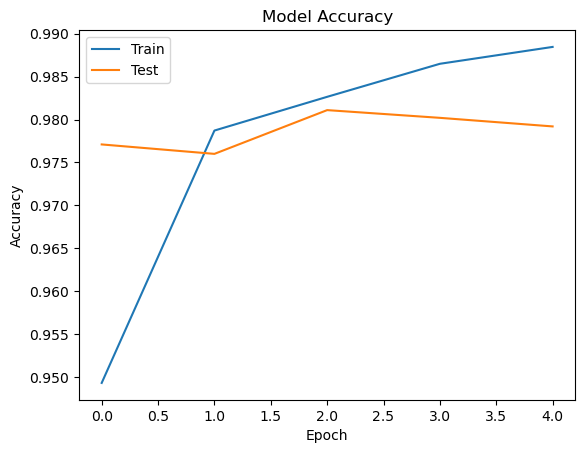

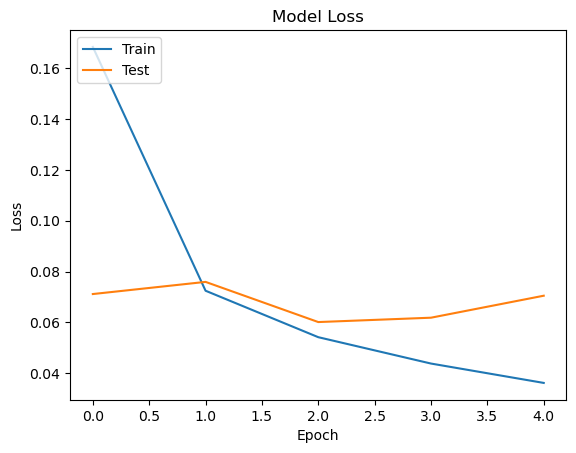

In [26]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()

In [39]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))#picselleri okuyor 4 pickselden en büyüğü alıyor bakma şeyi de 3,3 oluyor 
model.add(Flatten())#diziyi tek bir katman haline getiriyor 
model.add(Dense(100,activation="relu"))
model.add(Dense(10,activation="softmax"))
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer='adam',metrics='accuracy')

In [36]:
history=model.fit(train_images,train_labels,batch_size=32,epochs=5,verbose=1,validation_data=(test_images,test_labels))

Epoch 1/5


C:\Users\ahmet\anaconda3\lib\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 48s 25ms/step - loss: 0.1193 - accuracy: 0.9638 - val_loss: 0.0464 - val_accuracy: 0.9843
Epoch 2/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0372 - accuracy: 0.9888 - val_loss: 0.0351 - val_accuracy: 0.9884
Epoch 3/5
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0249 - accuracy: 0.9919 - val_loss: 0.0427 - val_accuracy: 0.9878
Epoch 4/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0170 - accuracy: 0.9944 - val_loss: 0.0355 - val_accuracy: 0.9895
Epoch 5/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0124 - accuracy: 0.9960 - val_loss: 0.0439 - val_accuracy: 0.9877


In [37]:
_,accuracy=model.evaluate(test_images,test_labels)
print("Accuracy=%2f"%(accuracy*100))

313/313 [==============================] - 2s 6ms/step - loss: 0.0439 - accuracy: 0.9877
Accuracy=98.769999


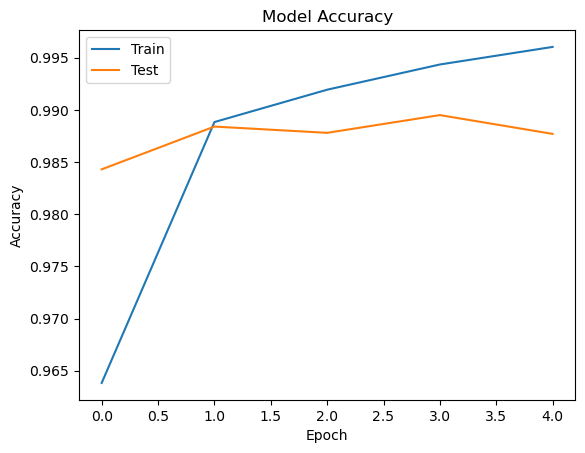

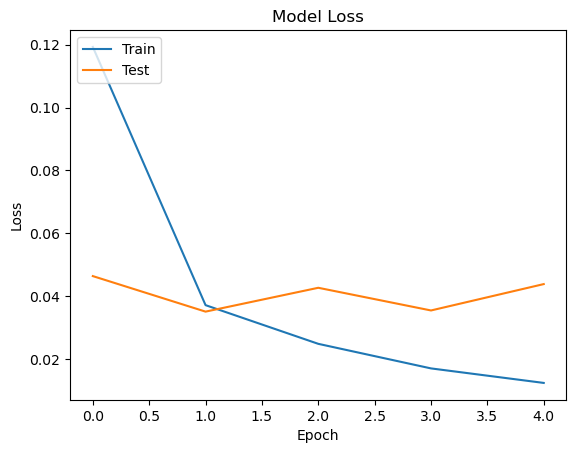

In [38]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()

In [ ]:
#docker paketlerin dışarıdan bağlantıyı keser update almaz nasıl çalışıyorsa öyle devam eder  